In [ ]:
import pandas as pd

**Percentual de Preenchimento da Base Final**

In [ ]:
df = pd.read_excel('base_final.xlsx')  # ou outro nome de arquivo

# Total de linhas
total_linhas = len(df)

# Calcular percentual de preenchimento por coluna
percentual_preenchimento = df.notnull().sum() / total_linhas * 100

# Exibir resultado formatado
print(percentual_preenchimento.round(2).sort_values(ascending=False))

rank            100.00
title           100.00
artist          100.00
main_artist     100.00
date            100.00
spotify_id       99.42
duration         99.42
release_date     99.38
genre            98.63
duration_ms      81.50
mode             81.50
tempo            81.50
dtype: float64


In [ ]:
inicio_pandemia = pd.to_datetime("11/03/2020")
fim_pandemia = pd.to_datetime("08/11/2021")

# Cria a coluna de período
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

**5 Maiores Gêneros Musicais da Pré Pandemia, Pandemia e Pós Pandemia**

In [ ]:
# --- GARANTIR que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- DEFINIR períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- AGRUPAR por período e gênero ---
generos_por_periodo = (
    df.groupby(["periodo", "genre"])
      .size()
      .reset_index(name="contagem")
)

# --- Ordem fixa dos períodos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]

# --- PEGAR top 5 de cada período ---
resultados = {}
for periodo in ordem_periodos:
    subset = generos_por_periodo[generos_por_periodo["periodo"] == periodo] \
                .sort_values("contagem", ascending=False)
    top5 = subset.head(5)
    resultados[periodo] = {"maiores": top5}

# --- Exibir resultados na ordem correta ---
for periodo in ordem_periodos:
    print(f"\n=== {periodo.upper()} ===")
    print("\nTOP 5 GÊNEROS:")
    print(resultados[periodo]["maiores"])


=== PRÉ-PANDEMIA ===

TOP 5 GÊNEROS:
         periodo    genre  contagem
56  pré-pandemia  hip-hop      1656
67  pré-pandemia      pop      1416
70  pré-pandemia      rap       507
45  pré-pandemia  country       432
78  pré-pandemia     trap       314

=== PANDEMIA ===

TOP 5 GÊNEROS:
     periodo    genre  contagem
25  pandemia      pop      1047
14  pandemia  hip-hop       762
8   pandemia  country       680
28  pandemia      rap       631
30  pandemia      rnb       304

=== PÓS-PANDEMIA ===

TOP 5 GÊNEROS:
          periodo    genre  contagem
119  pós-pandemia      pop      1273
94   pós-pandemia  country      1101
103  pós-pandemia  hip-hop       666
121  pós-pandemia      rap       483
123  pós-pandemia      rnb       453


**5 Menores Gêneros Musicais da Pré Pandemia, Pandemia e Pós Pandemia**

In [ ]:
# --- GARANTIR que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- DEFINIR períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- AGRUPAR por período e gênero ---
generos_por_periodo = (
    df.groupby(["periodo", "genre"])
      .size()
      .reset_index(name="contagem")
)

# --- Ordem fixa dos períodos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]

# --- PEGAR top 5 e bottom 5 de cada período ---
resultados = {}
for periodo in ordem_periodos:
    subset = generos_por_periodo[generos_por_periodo["periodo"] == periodo] \
                .sort_values("contagem", ascending=False)
    bottom5 = subset.tail(5)   # Top 5 gêneros menos frequentes
    resultados[periodo] = {"menores": bottom5}

# --- Exibir resultados ---
for periodo in ordem_periodos:
    print(f"\n=== {periodo.upper()} ===")
    print("\nBOTTOM 5 GÊNEROS:")
    print(resultados[periodo]["menores"])


=== PRÉ-PANDEMIA ===

BOTTOM 5 GÊNEROS:
         periodo             genre  contagem
42  pré-pandemia         christmas         1
46  pré-pandemia            disney         1
58  pré-pandemia             house         1
51  pré-pandemia  female vocalists         1
54  pré-pandemia          hamilton         1

=== PANDEMIA ===

BOTTOM 5 GÊNEROS:
     periodo          genre  contagem
27  pandemia            rac         2
5   pandemia      christmas         1
15  pandemia          house         1
33  pandemia    rock n roll         1
35  pandemia  southern rock         1

=== PÓS-PANDEMIA ===

BOTTOM 5 GÊNEROS:
          periodo              genre  contagem
86   pós-pandemia             ballad         1
117  pós-pandemia           nu metal         1
128  pós-pandemia           sierreno         1
129  pós-pandemia  singer-songwriter         1
131  pós-pandemia         soundtrack         1


**Faixas Únicas por Período**

In [ ]:
# Garantir que 'date' está como datetime
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# Definir períodos
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# Contar valores únicos de spotify_id em cada período
unicos_por_periodo = df.groupby("periodo")["spotify_id"].nunique()

# Garantir ordem correta
ordem = ["pré-pandemia", "pandemia", "pós-pandemia"]
unicos_por_periodo = unicos_por_periodo.reindex(ordem)

print(unicos_por_periodo)

periodo
pré-pandemia    635
pandemia        609
pós-pandemia    769
Name: spotify_id, dtype: int64


**BPM Médio por Período**

In [ ]:
# --- Garantir que a coluna 'tempo' seja numérica ---
df["tempo"] = pd.to_numeric(df["tempo"], errors="coerce")

# --- Garantir que a coluna 'date' seja datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Definir a ordem dos períodos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]

df["periodo"] = pd.Categorical(df["periodo"], categories=ordem_periodos, ordered=True)

# --- Calcular média de BPM por período ---
media_bpm_por_periodo = (
    df.groupby("periodo")["tempo"]
      .mean()
      .reset_index(name="media_bpm")
      .sort_values("periodo")   # respeita a ordem definida
)

print("Média de BPM por período (ordenado):")
print(media_bpm_por_periodo)

Média de BPM por período (ordenado):
        periodo   media_bpm
0  pré-pandemia  119.530403
1      pandemia  120.871776
2  pós-pandemia  122.896372


/tmp/ipython-input-1199047122.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("periodo")["tempo"]


In [ ]:
import pandas as pd

# --- Garantir que a coluna 'tempo' seja numérica ---
df["tempo"] = pd.to_numeric(df["tempo"], errors="coerce")

# --- Garantir que a coluna 'date' seja datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir datas de início e fim da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Função para classificar períodos ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

# --- Aplicar classificação de períodos ---
df["periodo"] = df["date"].apply(classificar_periodo)

# --- Definir a ordem dos períodos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
df["periodo"] = pd.Categorical(df["periodo"], categories=ordem_periodos, ordered=True)

# --- Filtrar valores válidos para 'tempo' (não nulos e > 1) ---
df_filtrado = df[(df["tempo"] > 1) & (df["tempo"].notna()) & (df["genre"].notna())]

# --- Encontrar os 5 gêneros musicais mais frequentes ---
top_5_generos = (
    df_filtrado["genre"]
    .value_counts()
    .head(5)
    .index
)

# --- Filtrar apenas os gêneros mais frequentes ---
df_top_generos = df_filtrado[df_filtrado["genre"].isin(top_5_generos)]

# --- Calcular média de BPM por gênero musical (apenas top 5) ---
media_bpm_top_5_generos = (
    df_top_generos.groupby("genre")["tempo"]
    .mean()
    .reset_index(name="media_bpm")
    .sort_values("media_bpm", ascending=False)
)

# --- Exibir resultado ---
print("Média de BPM dos 5 gêneros musicais mais frequentes (valores > 1 e não nulos):")
print(media_bpm_top_5_generos)

Média de BPM dos 5 gêneros musicais mais frequentes (valores > 1 e não nulos):
     genre   media_bpm
1  hip-hop  124.780774
3      rap  123.180901
2      pop  121.213521
0  country  118.090600
4      rnb  116.828504


In [ ]:
import pandas as pd

# --- Garantir que a coluna 'tempo' seja numérica ---
df["tempo"] = pd.to_numeric(df["tempo"], errors="coerce")

# --- Garantir que a coluna 'date' seja datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir datas de início e fim da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Função para classificar períodos ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

# --- Aplicar classificação de períodos ---
df["periodo"] = df["date"].apply(classificar_periodo)

# --- Definir a ordem dos períodos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
df["periodo"] = pd.Categorical(df["periodo"], categories=ordem_periodos, ordered=True)

# --- Filtrar valores válidos ---
df_filtrado = df[
    (df["tempo"] > 1) &
    (df["tempo"].notna()) &
    (df["genre"].notna()) &
    (df["periodo"] != "desconhecido")
]

# --- Encontrar os 5 gêneros mais frequentes ---
top_5_generos = (
    df_filtrado["genre"]
    .value_counts()
    .head(5)
    .index
)

# --- Filtrar apenas os dados dos top 5 gêneros ---
df_top_generos = df_filtrado[df_filtrado["genre"].isin(top_5_generos)]

# --- Calcular média de BPM por gênero e por período ---
media_bpm_genero_periodo = (
    df_top_generos.groupby(["genre", "periodo"])["tempo"]
    .mean()
    .reset_index(name="media_bpm")
    .sort_values(["genre", "periodo"])
)

# --- Exibir resultado ---
print("Média de BPM por gênero (top 5) e por período:")
print(media_bpm_genero_periodo)

Média de BPM por gênero (top 5) e por período:
      genre       periodo   media_bpm
0   country  pré-pandemia  114.218118
1   country      pandemia  116.467879
2   country  pós-pandemia  125.654716
3   hip-hop  pré-pandemia  125.588535
4   hip-hop      pandemia  124.738071
5   hip-hop  pós-pandemia  122.751677
6       pop  pré-pandemia  117.459370
7       pop      pandemia  118.791057
8       pop  pós-pandemia  127.343524
9       rap  pré-pandemia  121.721023
10      rap      pandemia  125.688780
11      rap  pós-pandemia  122.212186
12      rnb  pré-pandemia  112.515026
13      rnb      pandemia  123.768948
14      rnb  pós-pandemia  114.370379


/tmp/ipython-input-777303883.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top_generos.groupby(["genre", "periodo"])["tempo"]


**Duração Média das Faixas por Período**

In [ ]:
# --- Garantir que 'duration_ms' é numérico ---
df["duration_ms"] = pd.to_numeric(df["duration_ms"], errors="coerce")

# --- Converter para minutos ---
df["duration_min"] = df["duration_ms"] / 60000   # 1 min = 60.000 ms

# --- Garantir que 'date' é datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Definir ordem dos períodos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
df["periodo"] = pd.Categorical(df["periodo"], categories=ordem_periodos, ordered=True)

# --- Calcular duração média em minutos ---
media_duracao = (
    df.groupby("periodo")["duration_min"]
      .mean()
      .reset_index(name="media_duracao_min")
      .sort_values("periodo")
)

print("Duração média das faixas (em minutos) por período:")
print(media_duracao)

Duração média das faixas (em minutos) por período:
        periodo  media_duracao_min
0  pré-pandemia           3.354901
1      pandemia           3.278095
2  pós-pandemia           3.301109


/tmp/ipython-input-3371715073.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("periodo")["duration_min"]


**Tonalidade das Faixas por Período**

In [ ]:
# --- Garantir que 'date' é datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Garantir ordem dos períodos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
df["periodo"] = pd.Categorical(df["periodo"], categories=ordem_periodos, ordered=True)

# --- Contagem de tonalidade por período ---
predominancia = (
    df.groupby(["periodo", "mode"])
      .size()
      .reset_index(name="contagem")
)

# --- Tabela lado a lado ---
tabela_lado_lado = (
    predominancia
    .pivot(index="periodo", columns="mode", values="contagem")
    .fillna(0)
    .astype(int)
    .reset_index()
)

print("\n=== Distribuição Major × Minor por Período ===")
print(tabela_lado_lado)


=== Distribuição Major × Minor por Período ===
mode       periodo  Major  Minor
0     pré-pandemia   3353   1988
1         pandemia   2036   1283
2     pós-pandemia   2571   1523


/tmp/ipython-input-3809397968.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["periodo", "mode"])


In [ ]:
import pandas as pd

# --- Garantir que a coluna 'date' seja datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Garantir que 'spotify_id' é string ---
df["spotify_id"] = df["spotify_id"].astype(str)

# --- Definir datas da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Classificar período ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
df["periodo"] = pd.Categorical(df["periodo"], categories=ordem_periodos, ordered=True)

# --- Remover entradas com periodo desconhecido ou spotify_id ausente ---
df = df[df["periodo"] != "desconhecido"]
df = df[df["spotify_id"].notna()]

# --- Agrupar: contar semanas únicas por faixa e período ---
duracao_ranking = (
    df.groupby(["spotify_id", "periodo"])["date"]
      .nunique()  # Conta quantas semanas únicas a faixa apareceu no ranking
      .reset_index(name="semanas_no_ranking")
)

# --- Calcular tempo médio no ranking por período ---
tempo_medio_por_periodo = (
    duracao_ranking.groupby("periodo")["semanas_no_ranking"]
      .mean()
      .reset_index(name="tempo_medio_semanas")
)

# --- Exibir resultado ---
print("Tempo médio que uma faixa permanece no ranking (em semanas), por período:")
print(tempo_medio_por_periodo)

Tempo médio que uma faixa permanece no ranking (em semanas), por período:
        periodo  tempo_medio_semanas
0  pré-pandemia             3.053026
1      pandemia             2.324049
2  pós-pandemia             2.999464


/tmp/ipython-input-2265764010.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["spotify_id", "periodo"])["date"]
/tmp/ipython-input-2265764010.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duracao_ranking.groupby("periodo")["semanas_no_ranking"]


In [ ]:
import pandas as pd

# --- Garantir tipos corretos ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["rank"] = pd.to_numeric(df["rank"], errors="coerce")
df["genre"] = df["genre"].astype(str)

# --- Classificar período ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Filtrar apenas pré e pós-pandemia ---
df = df[df["periodo"].isin(["pré-pandemia", "pós-pandemia"])]

# --- Criar grupos de faixas (1–10, 11–20, ...) ---
def agrupar_faixa(pos):
    if pd.isna(pos):
        return "desconhecido"
    grupo = ((int(pos) - 1) // 10) * 10 + 1
    return f"{grupo:02d}-{grupo+9:02d}"

df["grupo_posicao"] = df["rank"].apply(agrupar_faixa)

# --- Remover posições inválidas ---
df = df[df["grupo_posicao"] != "desconhecido"]

# --- Contar frequência de gêneros por grupo e período ---
frequencia_generos = (
    df.groupby(["periodo", "grupo_posicao", "genre"])
      .size()
      .reset_index(name="frequencia")
      .sort_values(["periodo", "grupo_posicao", "frequencia"], ascending=[True, True, False])
)

# --- Exibir resultado ---
print("Gêneros mais frequentes por grupo de posição e período (pré e pós-pandemia):")
print(frequencia_generos)

Gêneros mais frequentes por grupo de posição e período (pré e pós-pandemia):
          periodo grupo_posicao       genre  frequencia
6    pré-pandemia         01-10     hip-hop         450
12   pré-pandemia         01-10         pop         332
15   pré-pandemia         01-10         rap          55
14   pré-pandemia         01-10    pop rock          50
19   pré-pandemia         01-10        trap          47
..            ...           ...         ...         ...
334  pós-pandemia         41-50       latin           1
335  pós-pandemia         41-50   metallica           1
346  pós-pandemia         41-50        rock           1
350  pós-pandemia         41-50    sierreno           1
352  pós-pandemia         41-50  soundtrack           1

[355 rows x 4 columns]


/tmp/ipython-input-1771169559.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_grafico, x="frequencia", y="genre", palette="Set2")


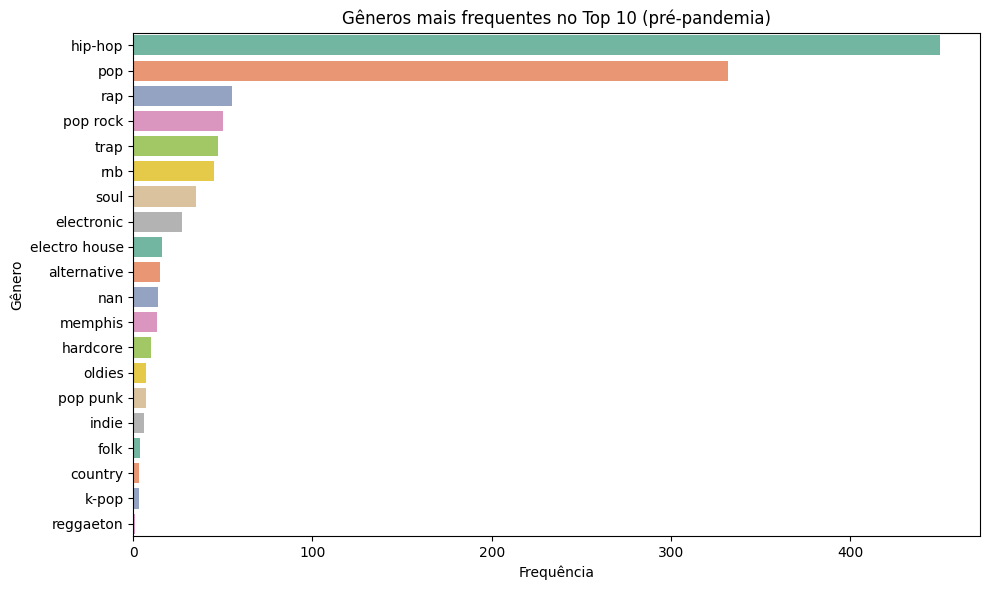

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Filtrar para gráfico (ex: pré-pandemia, top 10) ---
dados_grafico = frequencia_generos[
    (frequencia_generos["periodo"] == "pré-pandemia") &
    (frequencia_generos["grupo_posicao"] == "01-10")
]

# --- Gráfico de barras ---
plt.figure(figsize=(10,6))
sns.barplot(data=dados_grafico, x="frequencia", y="genre", palette="Set2")
plt.title("Gêneros mais frequentes no Top 10 (pré-pandemia)")
plt.xlabel("Frequência")
plt.ylabel("Gênero")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# --- Garantir tipos corretos ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["rank"] = pd.to_numeric(df["rank"], errors="coerce")
df["genre"] = df["genre"].astype(str)

# --- Classificar período ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Filtrar apenas pré e pós-pandemia ---
df = df[df["periodo"].isin(["pré-pandemia", "pós-pandemia"])]

# --- Criar grupos de faixas (1–10, 11–20, ...) ---
def agrupar_faixa(pos):
    if pd.isna(pos):
        return "desconhecido"
    grupo = ((int(pos) - 1) // 10) * 10 + 1
    return f"{grupo:02d}-{grupo+9:02d}"

df["grupo_posicao"] = df["rank"].apply(agrupar_faixa)

# --- Remover posições inválidas ---
df = df[df["grupo_posicao"] != "desconhecido"]

# --- Identificar os 10 gêneros mais frequentes na base ---
top_10_generos = df["genre"].value_counts().nlargest(10).index

# --- Filtrar apenas os 10 gêneros mais frequentes ---
df_top = df[df["genre"].isin(top_10_generos)]

# --- Contar frequência de gêneros por grupo e período ---
frequencia_generos = (
    df_top.groupby(["periodo", "grupo_posicao", "genre"])
          .size()
          .reset_index(name="frequencia")
          .sort_values(["periodo", "grupo_posicao", "frequencia"], ascending=[True, True, False])
)

# --- Exibir resultado ---
print("Gêneros mais frequentes por grupo de posição e período (pré e pós-pandemia):")
print(frequencia_generos)

Gêneros mais frequentes por grupo de posição e período (pré e pós-pandemia):
         periodo grupo_posicao       genre  frequencia
2   pré-pandemia         01-10     hip-hop         450
4   pré-pandemia         01-10         pop         332
5   pré-pandemia         01-10         rap          55
9   pré-pandemia         01-10        trap          47
7   pré-pandemia         01-10         rnb          45
..           ...           ...         ...         ...
96  pós-pandemia         41-50   reggaeton          63
99  pós-pandemia         41-50        trap          41
93  pós-pandemia         41-50       indie          24
98  pós-pandemia         41-50        soul          23
91  pós-pandemia         41-50  electronic           6

[100 rows x 4 columns]


In [ ]:
import pandas as pd

# --- Garantir tipos corretos ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["rank"] = pd.to_numeric(df["rank"], errors="coerce")
df["genre"] = df["genre"].astype(str)

# --- Classificar período ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Manter apenas períodos conhecidos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
df["periodo"] = pd.Categorical(df["periodo"], categories=ordem_periodos, ordered=True)

# --- Criar grupos de faixas (1–10, 11–20, ...) ---
def agrupar_faixa(pos):
    if pd.isna(pos):
        return "desconhecido"
    grupo = ((int(pos) - 1) // 10) * 10 + 1
    return f"{grupo:02d}-{grupo+9:02d}"

df["grupo_posicao"] = df["rank"].apply(agrupar_faixa)

# --- Remover posições inválidas ---
df = df[df["grupo_posicao"] != "desconhecido"]

# --- Identificar os 10 gêneros mais frequentes na base ---
top_10_generos = df["genre"].value_counts().nlargest(10).index

# --- Filtrar apenas os 10 gêneros mais frequentes ---
df_top = df[df["genre"].isin(top_10_generos)]

# --- Contar frequência de gêneros por grupo e período ---
frequencia_generos = (
    df_top.groupby(["periodo", "grupo_posicao", "genre"])
          .size()
          .reset_index(name="frequencia")
)

# --- Obter o gênero mais frequente em cada grupo/periodo ---
genero_mais_frequente = (
    frequencia_generos.sort_values(["periodo", "grupo_posicao", "frequencia"], ascending=[True, True, False])
                      .groupby(["periodo", "grupo_posicao"])
                      .first()
                      .reset_index()
)

# --- Exibir resultado final ---
print("🎵 Gênero mais frequente por grupo de posição e período:")
print(genero_mais_frequente)

🎵 Gênero mais frequente por grupo de posição e período:
         periodo grupo_posicao    genre  frequencia
0   pré-pandemia         01-10  hip-hop         450
1   pré-pandemia         11-20  hip-hop         348
2   pré-pandemia         21-30      pop         300
3   pré-pandemia         31-40  hip-hop         276
4   pré-pandemia         41-50  hip-hop         284
5       pandemia         01-10  country           0
6       pandemia         11-20  country           0
7       pandemia         21-30  country           0
8       pandemia         31-40  country           0
9       pandemia         41-50  country           0
10  pós-pandemia         01-10      pop         305
11  pós-pandemia         11-20      pop         306
12  pós-pandemia         21-30      pop         263
13  pós-pandemia         31-40  country         287
14  pós-pandemia         41-50  country         255


/tmp/ipython-input-2100837947.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top.groupby(["periodo", "grupo_posicao", "genre"])
/tmp/ipython-input-2100837947.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["periodo", "grupo_posicao"])


In [ ]:
print(df["periodo"].value_counts(dropna=False))

periodo
pré-pandemia    5700
pós-pandemia    5600
Name: count, dtype: int64


In [ ]:
import pandas as pd

# --- Garantir que 'date' é datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir intervalo pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Filtrar dados apenas do período pandemia ---
df_pandemia = df[(df["date"] >= inicio_pandemia) & (df["date"] <= fim_pandemia)]

# --- Garantir 'rank' e 'genre' com tipos corretos ---
df_pandemia["rank"] = pd.to_numeric(df_pandemia["rank"], errors="coerce")
df_pandemia["genre"] = df_pandemia["genre"].astype(str)

# --- Contar frequência dos gêneros ---
frequencia_generos_pandemia = (
    df_pandemia["genre"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "genre", "genre": "frequencia"})
)

# --- Puxar os 10 maiores gêneros ---
top_10_generos_pandemia = frequencia_generos_pandemia.head(10)

print("Top 10 gêneros mais frequentes no período pandemia:")
print(top_10_generos_pandemia)

Top 10 gêneros mais frequentes no período pandemia:
Empty DataFrame
Columns: [frequencia, count]
Index: []


In [ ]:
import pandas as pd

# Supondo que df já está carregado

# --- Garantir que 'date' é datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir intervalo pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Filtrar dados do período pandemia ---
df_pandemia = df[(df["date"] >= inicio_pandemia) & (df["date"] <= fim_pandemia)]

# Verificar quantos registros temos nesse período
print(f"Número de registros no período pandemia: {len(df_pandemia)}")

# --- Garantir que 'genre' é string e 'rank' numérico ---
df_pandemia["genre"] = df_pandemia["genre"].astype(str)
df_pandemia["rank"] = pd.to_numeric(df_pandemia["rank"], errors="coerce")

# --- Contar frequência dos gêneros ---
frequencia_generos = df_pandemia["genre"].value_counts().reset_index()
frequencia_generos.columns = ["genre", "frequencia"]

# --- Mostrar os 10 gêneros mais frequentes ---
top_10_generos = frequencia_generos.head(10)

print("Top 10 gêneros musicais no período pandemia:")
print(top_10_generos)

Número de registros no período pandemia: 0
Top 10 gêneros musicais no período pandemia:
Empty DataFrame
Columns: [genre, frequencia]
Index: []


In [ ]:
# --- GARANTIR que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- DEFINIR períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- AGRUPAR por período e gênero ---
generos_por_periodo = (
    df.groupby(["periodo", "genre"])
      .size()
      .reset_index(name="contagem")
)

# --- Ordem fixa dos períodos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]

# --- PEGAR top 5 de cada período ---
resultados = {}
for periodo in ordem_periodos:
    subset = generos_por_periodo[generos_por_periodo["periodo"] == periodo] \
                .sort_values("contagem", ascending=False)
    top5 = subset.head(5)
    resultados[periodo] = {"maiores": top5}

# --- Exibir resultados na ordem correta ---
for periodo in ordem_periodos:
    print(f"\n=== {periodo.upper()} ===")
    print("\nTOP 5 GÊNEROS:")
    print(resultados[periodo]["maiores"])


=== PRÉ-PANDEMIA ===

TOP 5 GÊNEROS:
         periodo    genre  contagem
56  pré-pandemia  hip-hop      1656
67  pré-pandemia      pop      1416
70  pré-pandemia      rap       507
45  pré-pandemia  country       432
78  pré-pandemia     trap       314

=== PANDEMIA ===

TOP 5 GÊNEROS:
     periodo    genre  contagem
25  pandemia      pop      1047
14  pandemia  hip-hop       762
8   pandemia  country       680
28  pandemia      rap       631
30  pandemia      rnb       304

=== PÓS-PANDEMIA ===

TOP 5 GÊNEROS:
          periodo    genre  contagem
119  pós-pandemia      pop      1273
94   pós-pandemia  country      1101
103  pós-pandemia  hip-hop       666
121  pós-pandemia      rap       483
123  pós-pandemia      rnb       453


In [ ]:
import pandas as pd

# --- Garantir que 'date' está no formato datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir intervalo da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Filtrar registros do período da pandemia ---
df_pandemia = df[(df["date"] >= inicio_pandemia) & (df["date"] <= fim_pandemia)]

# --- Garantir que 'genre' é string ---
df_pandemia["genre"] = df_pandemia["genre"].astype(str)

# --- Contar os gêneros mais frequentes ---
top5_generos_pandemia = (
    df_pandemia["genre"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "genre", "genre": "frequencia"})
    .head(5)
)

# --- Exibir resultado ---
print("🎧 Top 5 gêneros musicais durante a pandemia:")
print(top5_generos_pandemia)

🎧 Top 5 gêneros musicais durante a pandemia:
  frequencia  count
0        pop   1047
1    hip-hop    762
2    country    680
3        rap    631
4        rnb    304


/tmp/ipython-input-4170690890.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandemia["genre"] = df_pandemia["genre"].astype(str)


In [ ]:
import pandas as pd

# --- Garantir tipos corretos ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["genre"] = df["genre"].astype(str)
df["mode"] = df["mode"].astype(str)

# --- Definir período da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Filtrar registros da pandemia ---
df_pandemia = df[(df["date"] >= inicio_pandemia) & (df["date"] <= fim_pandemia)]

# --- Obter os 5 gêneros mais frequentes ---
top5_generos = df_pandemia["genre"].value_counts().head(5).index

# --- Filtrar para os 5 gêneros principais e remover modes ausentes ---
df_top5 = df_pandemia[
    (df_pandemia["genre"].isin(top5_generos)) &
    (df_pandemia["mode"].isin(["major", "minor"]))
]

# --- Contar frequência de cada tonalidade por gênero ---
tonalidade_principal = (
    df_top5.groupby(["genre", "mode"])
    .size()
    .reset_index(name="frequencia")
    .sort_values(["genre", "frequencia"], ascending=[True, False])
    .drop_duplicates(subset="genre", keep="first")  # Pega a tonalidade mais frequente por gênero
    .reset_index(drop=True)
)

# --- Exibir resultado ---
print("🎼 Tonalidade mais frequente por gênero durante a pandemia:")
print(tonalidade_principal)

🎼 Tonalidade mais frequente por gênero durante a pandemia:
Empty DataFrame
Columns: [genre, mode, frequencia]
Index: []


In [ ]:
import pandas as pd

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Normalizar os valores da coluna 'mode' ---
df["mode"] = df["mode"].astype(str).str.strip().str.lower()

# --- Filtrar apenas registros válidos ('major' ou 'minor') ---
df = df[df["mode"].isin(["major", "minor"])]

# --- Contar frequências de tonalidade por período ---
tonalidade_por_periodo = (
    df.groupby(["periodo", "mode"])
      .size()
      .reset_index(name="contagem")
      .sort_values(["periodo", "contagem"], ascending=[True, False])
)

# --- Obter a tonalidade mais frequente por período ---
tonalidade_mais_frequente = (
    tonalidade_por_periodo
    .drop_duplicates(subset="periodo", keep="first")
    .reset_index(drop=True)
)

# --- Exibir resultados ---
print("🎼 Tonalidade (mode) mais frequente por período:")
print(tonalidade_mais_frequente)

🎼 Tonalidade (mode) mais frequente por período:
        periodo   mode  contagem
0      pandemia  major      2036
1  pré-pandemia  major      3353
2  pós-pandemia  major      2571


/tmp/ipython-input-3709496014.py:39: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


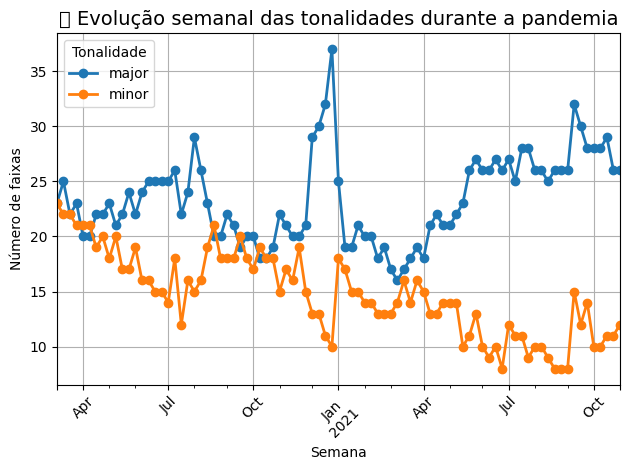

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Filtrar apenas registros durante a pandemia ---
df_pandemia = df[(df["date"] >= inicio_pandemia) & (df["date"] <= fim_pandemia)].copy()

# --- Normalizar 'mode' ---
df_pandemia["mode"] = df_pandemia["mode"].astype(str).str.strip().str.lower()

# --- Filtrar apenas registros com mode válido ---
df_pandemia = df_pandemia[df_pandemia["mode"].isin(["major", "minor"])]

# --- Criar coluna de semana (ano + semana ISO) ---
df_pandemia["semana"] = df_pandemia["date"].dt.to_period("W").apply(lambda r: r.start_time)

# --- Agrupar por semana e mode ---
contagem_semanal = (
    df_pandemia.groupby(["semana", "mode"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# --- Plotar gráfico de linhas ---
plt.figure(figsize=(14, 6))
contagem_semanal.plot(kind="line", marker="o", linewidth=2)
plt.title("🎼 Evolução semanal das tonalidades durante a pandemia", fontsize=14)
plt.xlabel("Semana")
plt.ylabel("Número de faixas")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Tonalidade")
plt.show()

/tmp/ipython-input-2096211281.py:36: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


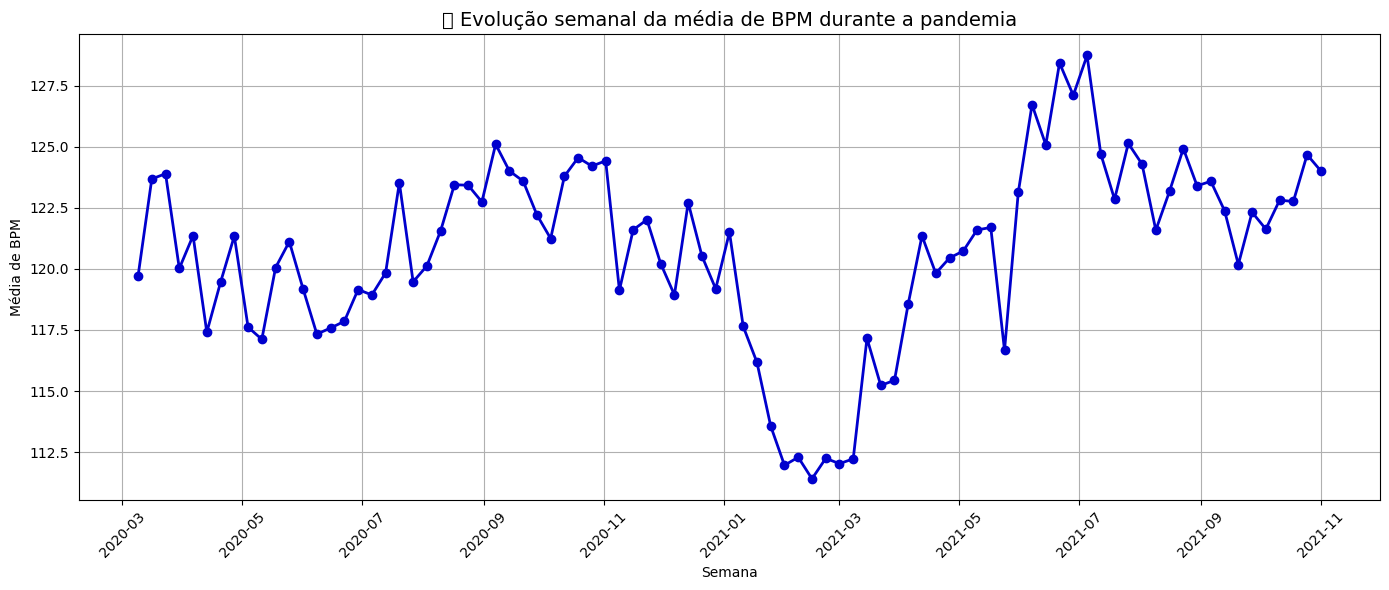

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Garantir que 'tempo' (BPM) é numérico ---
df["tempo"] = pd.to_numeric(df["tempo"], errors="coerce")

# --- Definir intervalo da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Filtrar apenas registros da pandemia ---
df_pandemia = df[(df["date"] >= inicio_pandemia) & (df["date"] <= fim_pandemia)].copy()

# --- Criar coluna de semana (início da semana) ---
df_pandemia["semana"] = df_pandemia["date"].dt.to_period("W").apply(lambda r: r.start_time)

# --- Calcular média semanal de BPM ---
media_bpm_semanal = (
    df_pandemia.groupby("semana")["tempo"]
    .mean()
    .reset_index()
    .sort_values("semana")
)

# --- Plotar gráfico ---
plt.figure(figsize=(14, 6))
plt.plot(media_bpm_semanal["semana"], media_bpm_semanal["tempo"], marker="o", color="mediumblue", linewidth=2)
plt.title("📈 Evolução semanal da média de BPM durante a pandemia", fontsize=14)
plt.xlabel("Semana")
plt.ylabel("Média de BPM")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1167440717.py:60: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


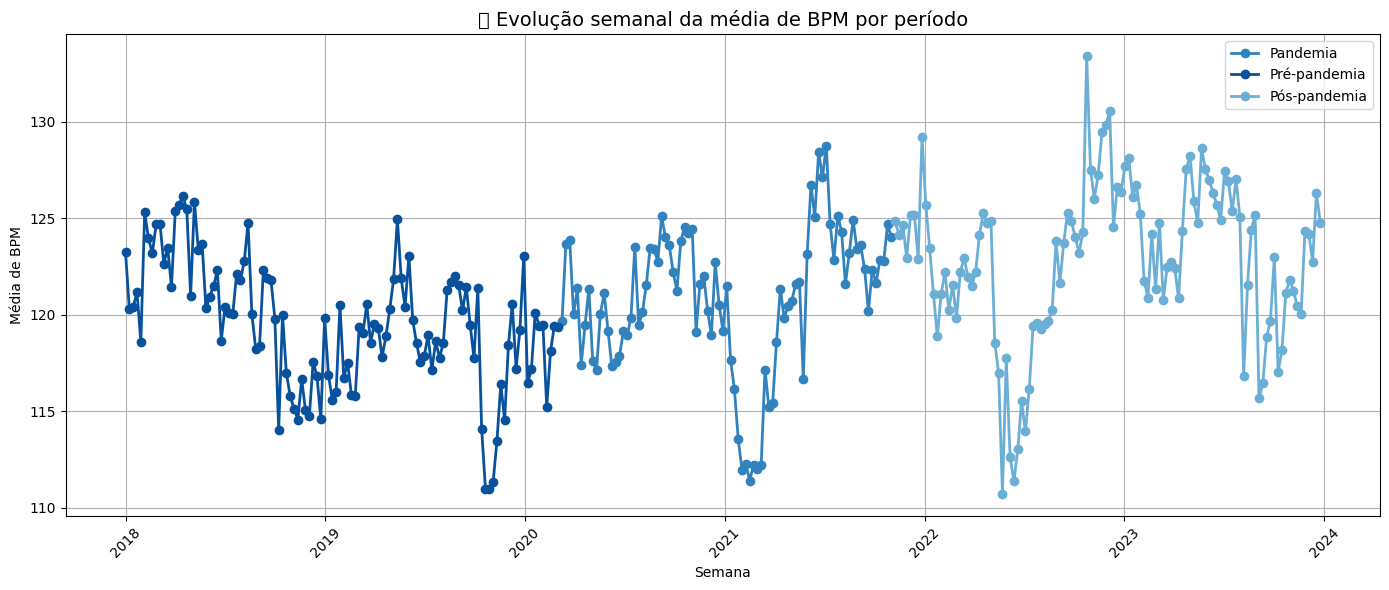

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Garantir que 'tempo' (BPM) é numérico ---
df["tempo"] = pd.to_numeric(df["tempo"], errors="coerce")

# --- Definir intervalo da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Criar coluna de período ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Remover linhas com data ou tempo inválidos ---
df_valid = df.dropna(subset=["date", "tempo"]).copy()

# --- Criar coluna semana (início da semana) ---
df_valid["semana"] = df_valid["date"].dt.to_period("W").apply(lambda r: r.start_time)

# --- Calcular média semanal de BPM por período ---
media_bpm_semanal = (
    df_valid.groupby(["periodo", "semana"])["tempo"]
    .mean()
    .reset_index()
    .sort_values(["periodo", "semana"])
)

# --- Plotar gráfico ---
plt.figure(figsize=(14, 6))

# Cores para os períodos
cores = {
    "pré-pandemia": "#08519c",
    "pandemia": "#3182bd",
    "pós-pandemia": "#6baed6"
}

for periodo, grupo in media_bpm_semanal.groupby("periodo"):
    plt.plot(grupo["semana"], grupo["tempo"], marker="o", linewidth=2, label=periodo.capitalize(), color=cores.get(periodo, "gray"))

plt.title("📈 Evolução semanal da média de BPM por período", fontsize=14)
plt.xlabel("Semana")
plt.ylabel("Média de BPM")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4115084557.py:63: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


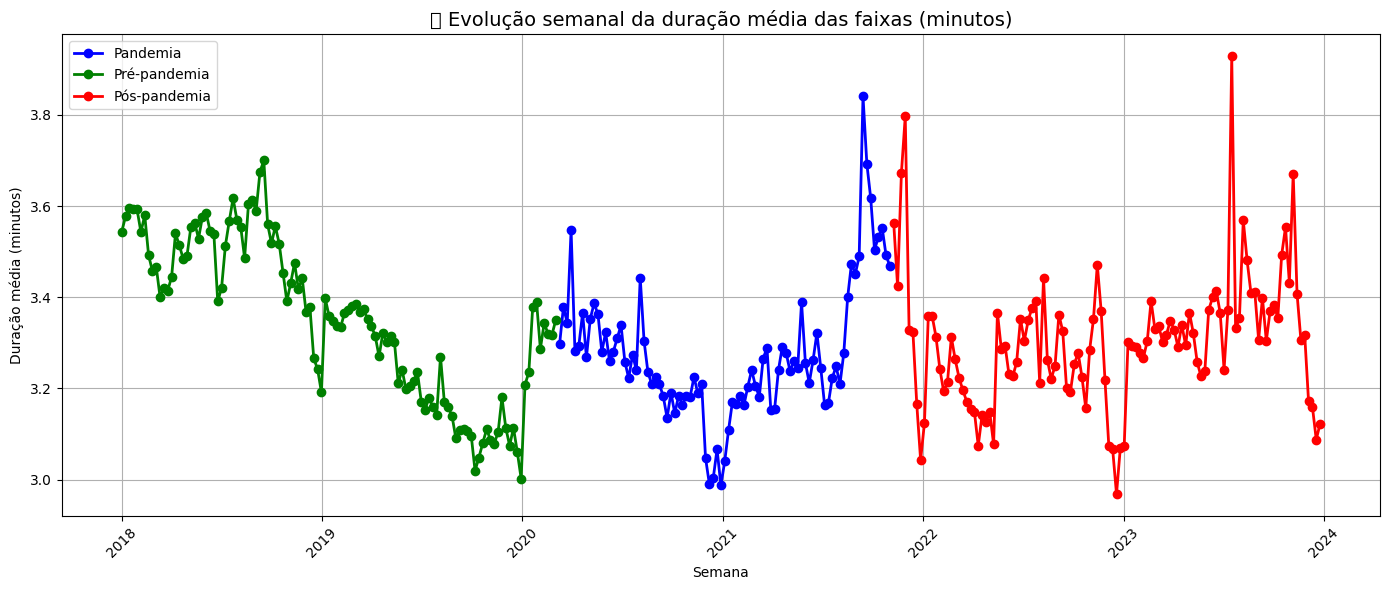

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Garantir que 'duration_ms' é numérico ---
df["duration_ms"] = pd.to_numeric(df["duration_ms"], errors="coerce")

# --- Converter duration_ms para minutos ---
df["duration_min"] = df["duration_ms"] / 60000  # 1000 ms * 60 s

# --- Definir intervalo da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Criar coluna de período ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Remover linhas com dados inválidos ---
df_valid = df.dropna(subset=["date", "duration_min"]).copy()

# --- Criar coluna semana (início da semana) ---
df_valid["semana"] = df_valid["date"].dt.to_period("W").apply(lambda r: r.start_time)

# --- Calcular média semanal da duração por período ---
media_duracao_semanal = (
    df_valid.groupby(["periodo", "semana"])["duration_min"]
    .mean()
    .reset_index()
    .sort_values(["periodo", "semana"])
)

# --- Plotar gráfico ---
plt.figure(figsize=(14, 6))

cores = {
    "pré-pandemia": "green",
    "pandemia": "blue",
    "pós-pandemia": "red"
}

for periodo, grupo in media_duracao_semanal.groupby("periodo"):
    plt.plot(grupo["semana"], grupo["duration_min"], marker="o", linewidth=2,
             label=periodo.capitalize(), color=cores.get(periodo, "gray"))

plt.title("⏱️ Evolução semanal da duração média das faixas (minutos)", fontsize=14)
plt.xlabel("Semana")
plt.ylabel("Duração média (minutos)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# --- Garantir que 'date' está no formato datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Garantir que 'mode' está padronizado ---
df["mode"] = df["mode"].astype(str).str.strip().str.lower()

# --- Definir intervalo da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Filtrar registros do período da pandemia ---
df_pandemia = df[(df["date"] >= inicio_pandemia) & (df["date"] <= fim_pandemia)].copy()

# --- Garantir que 'genre' é string ---
df_pandemia["genre"] = df_pandemia["genre"].astype(str)

# --- Selecionar os 5 gêneros mais frequentes ---
top5_generos_pandemia = (
    df_pandemia["genre"]
    .value_counts()
    .head(5)
    .index
)

# --- Filtrar dados apenas desses gêneros ---
df_top5 = df_pandemia[df_pandemia["genre"].isin(top5_generos_pandemia)]

# --- Agrupar por gênero e mode, contar frequências ---
frequencia_mode_por_genero = (
    df_top5.groupby(["genre", "mode"])
    .size()
    .reset_index(name="frequencia")
)

# --- Obter a tonalidade mais frequente para cada gênero ---
tonalidade_predominante = (
    frequencia_mode_por_genero.sort_values(["genre", "frequencia"], ascending=[True, False])
    .drop_duplicates(subset=["genre"], keep="first")
    .reset_index(drop=True)
)

tonalidade_predominante = tonalidade_predominante.sort_values("frequencia", ascending=False).reset_index(drop=True)

# --- Exibir resultado ---
print("🎼 Tonalidade predominante (mode) dos 5 gêneros mais populares durante a pandemia:")
print(tonalidade_predominante)

🎼 Tonalidade predominante (mode) dos 5 gêneros mais populares durante a pandemia:
     genre   mode  frequencia
0      pop  major         697
1  hip-hop  minor         405
2  country  major         246
3      rap  minor         195
4      rnb  major         168


/tmp/ipython-input-2853331889.py:61: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


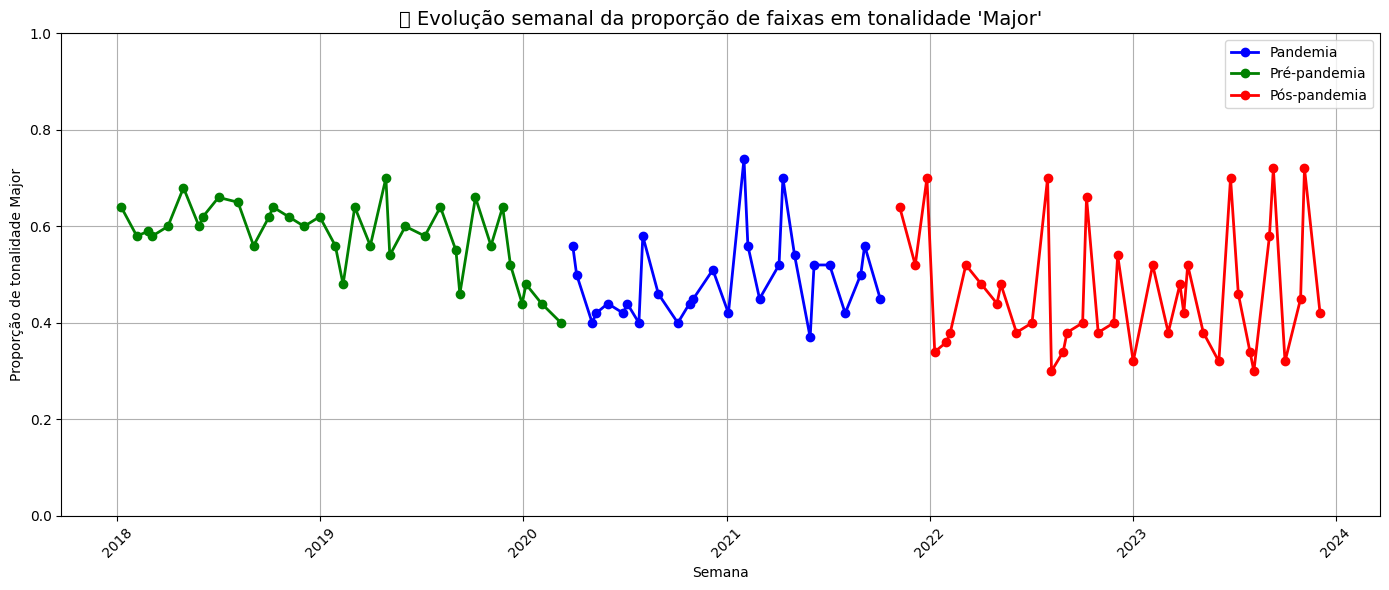

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Padronizar coluna 'mode' ---
df["mode"] = df["mode"].astype(str).str.strip().str.lower()

# --- Definir intervalo da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Criar coluna de período ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Remover linhas inválidas ---
df_valid = df.dropna(subset=["date", "mode"]).copy()

# --- Criar coluna de semana ---
df_valid["semana"] = df_valid["date"].dt.to_period("W").apply(lambda r: r.start_time)

# --- Calcular proporção de 'major' por semana ---
proporcao_major = (
    df_valid.groupby(["periodo", "semana"])["mode"]
    .apply(lambda x: (x == "major").sum() / x.count())
    .reset_index(name="proporcao_major")
    .sort_values(["periodo", "semana"])
)

# --- Plotar gráfico ---
plt.figure(figsize=(14, 6))

cores = {
    "pré-pandemia": "green",
    "pandemia": "blue",
    "pós-pandemia": "red"
}

for periodo, grupo in proporcao_major.groupby("periodo"):
    plt.plot(grupo["semana"], grupo["proporcao_major"], marker="o", linewidth=2,
             label=periodo.capitalize(), color=cores.get(periodo, "gray"))

plt.title("🎼 Evolução semanal da proporção de faixas em tonalidade 'Major'", fontsize=14)
plt.xlabel("Semana")
plt.ylabel("Proporção de tonalidade Major")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-767725905.py:60: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


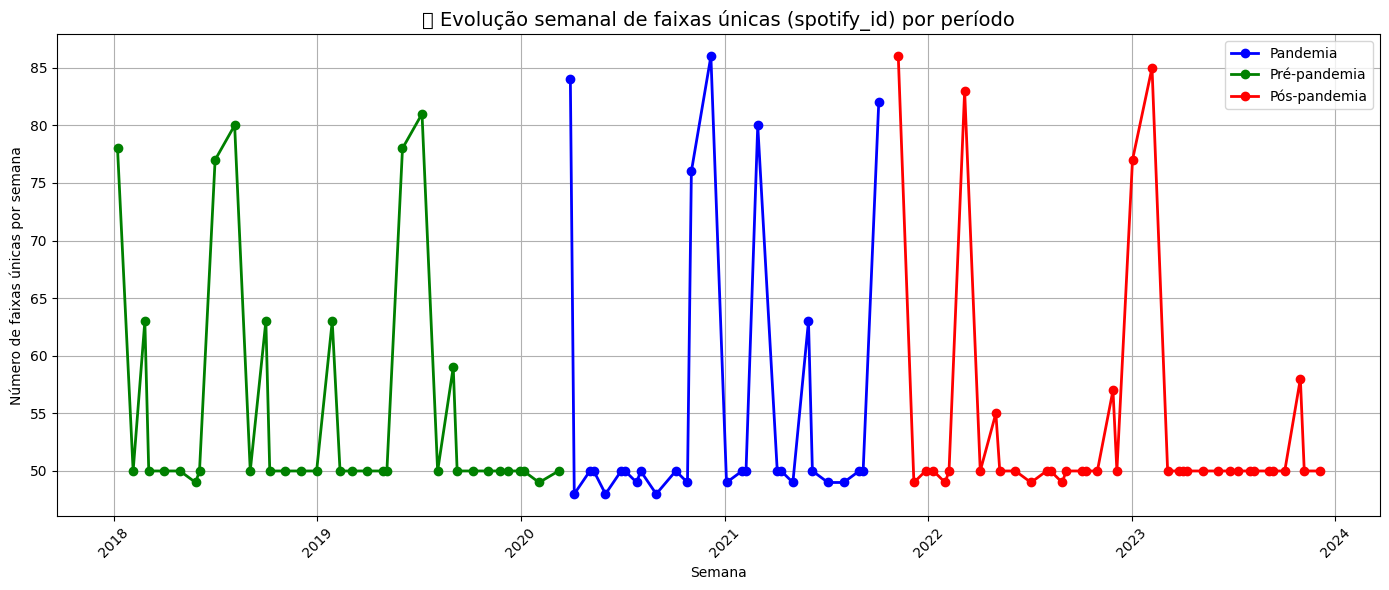

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir datas da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Classificar período ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Remover dados inválidos ---
df_valid = df.dropna(subset=["date", "spotify_id"]).copy()

# --- Criar coluna de semana ---
df_valid["semana"] = df_valid["date"].dt.to_period("W").apply(lambda r: r.start_time)

# --- Remover duplicatas (faixas únicas por semana) ---
df_unicos = df_valid.drop_duplicates(subset=["spotify_id", "semana"])

# --- Contar número de IDs únicos por semana ---
ids_unicos_por_semana = (
    df_unicos.groupby(["periodo", "semana"])["spotify_id"]
    .nunique()
    .reset_index(name="num_ids_unicos")
    .sort_values(["periodo", "semana"])
)

# --- Plotar gráfico ---
plt.figure(figsize=(14, 6))

cores = {
    "pré-pandemia": "green",
    "pandemia": "blue",
    "pós-pandemia": "red"
}

for periodo, grupo in ids_unicos_por_semana.groupby("periodo"):
    plt.plot(grupo["semana"], grupo["num_ids_unicos"], marker="o", linewidth=2,
             label=periodo.capitalize(), color=cores.get(periodo, "gray"))

plt.title("📈 Evolução semanal de faixas únicas (spotify_id) por período", fontsize=14)
plt.xlabel("Semana")
plt.ylabel("Número de faixas únicas por semana")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import re
from collections import Counter

# --- Carregar base ---
df = pd.read_excel("/content/base_final.xlsx")

# --- Converter 'date' para datetime ---
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# --- Definir períodos ---
def periodo_eua(row):
    if row['date'] < pd.Timestamp('2020-03-11'):
        return 'Pré-pandemia'
    elif pd.Timestamp('2020-03-11') <= row['date'] <= pd.Timestamp('2021-11-08'):
        return 'Pandemia'
    else:
        return 'Pós-pandemia'

df['periodo'] = df.apply(periodo_eua, axis=1)

# --- Lista de stopwords básicas ---
stopwords = set([
    'the', 'a', 'an', 'and', 'of', 'in', 'on', 'with', 'to', 'for', 'by', 'at',
    'from', 'is', 'it', 'i', 'you', 'my', 'me', 'we', 'our', 'your', 't', 's', 'don', 'what', 'u'
])

# --- Função para extrair palavras limpas de um título ---
def palavras_limpa(titulo):
    palavras = re.findall(r'\b\w+\b', str(titulo).lower())
    return [p for p in palavras if p not in stopwords]

# --- Criar coluna de palavras tokenizadas ---
df['palavras'] = df['title'].apply(palavras_limpa)

# --- Contar palavras no período da pandemia ---
todas_palavras_pandemia = [p for sublist in df[df['periodo']=='Pandemia']['palavras'] for p in sublist]
contagem_pandemia = Counter(todas_palavras_pandemia)

# --- Mostrar top 10 palavras da pandemia ---
print("\n🎤 Top 10 palavras mais frequentes nos títulos durante a Pandemia:")
for palavra, frequencia in contagem_pandemia.most_common(10):
    print(f"{palavra}: {frequencia}")


🎤 Top 10 palavras mais frequentes nos títulos durante a Pandemia:
love: 57
christmas: 52
good: 45
go: 43
now: 32
blinding: 27
lights: 27
heart: 27
like: 26
best: 26


In [ ]:
import pandas as pd

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir intervalo da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Criar coluna de período ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Filtrar dados válidos ---
df_valid = df.dropna(subset=["date", "spotify_id", "rank"]).copy()

# --- Criar coluna semana (início da semana) ---
df_valid["semana"] = df_valid["date"].dt.to_period("W").apply(lambda r: r.start_time)

# --- Identificar faixas que estiveram no top 10 em cada semana ---
top10_semanais = df_valid[df_valid["rank"] <= 10]

# --- Calcular o número total de semanas em que cada faixa apareceu no ranking ---
semanas_no_ranking = (
    df_valid.groupby("spotify_id")["semana"]
    .nunique()
    .reset_index(name="semanas_no_ranking")
)

# --- Associar cada faixa à sua primeira entrada no top 10 ---
primeira_entrada_top10 = (
    top10_semanais.sort_values("date")
    .drop_duplicates(subset="spotify_id", keep="first")[["spotify_id", "periodo"]]
)

# --- Juntar para ter período da primeira entrada no top 10 e total de semanas no ranking ---
df_longevidade = pd.merge(primeira_entrada_top10, semanas_no_ranking, on="spotify_id")

# --- Calcular média de semanas no ranking por período ---
longevidade_media_por_periodo = (
    df_longevidade.groupby("periodo")["semanas_no_ranking"]
    .mean()
    .reset_index()
    .sort_values("periodo")
)

# --- Exibir resultado ---
print("⏳ Longevidade média no ranking por período (faixas que entraram no top 10):")
print(longevidade_media_por_periodo)

⏳ Longevidade média no ranking por período (faixas que entraram no top 10):
        periodo  semanas_no_ranking
0      pandemia           19.915254
1  pré-pandemia           26.127820
2  pós-pandemia           18.046980


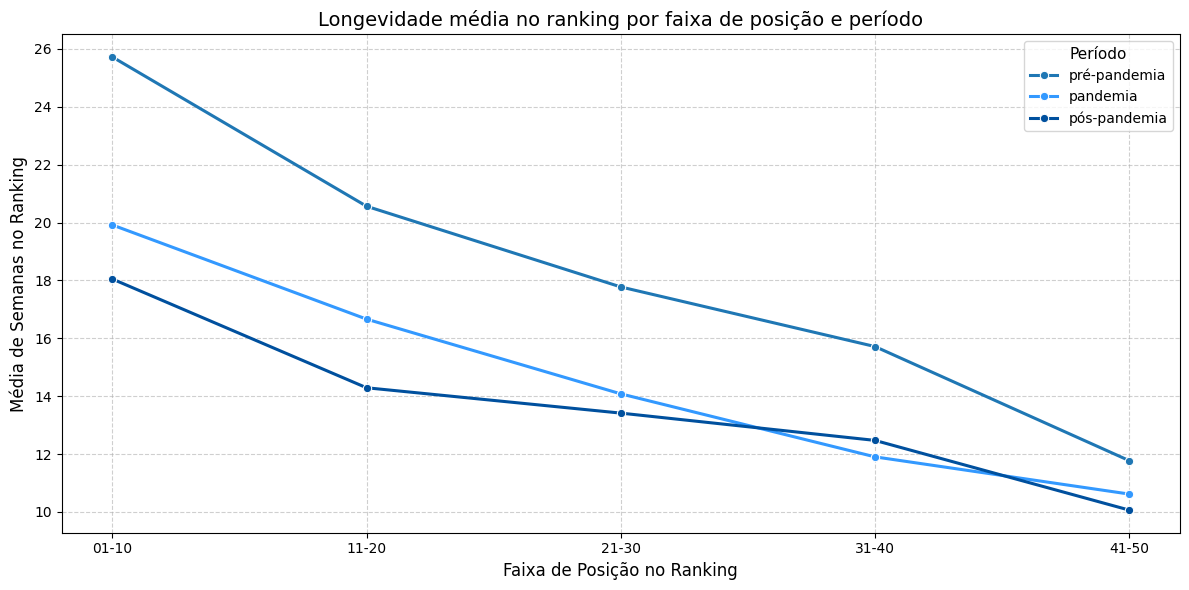

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Carregar os dados ---
df = pd.read_excel("/content/base_final (1).xlsx")  # substitua pelo caminho correto do seu arquivo

# --- Converter datas ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Limpeza e coluna semana ---
df = df.dropna(subset=["spotify_id", "rank", "date"])
df["semana"] = df["date"].dt.to_period("W").apply(lambda r: r.start_time)

# --- Faixas de ranking ---
def faixa_ranking(rank):
    if 1 <= rank <= 10:
        return "01-10"
    elif 11 <= rank <= 20:
        return "11-20"
    elif 21 <= rank <= 30:
        return "21-30"
    elif 31 <= rank <= 40:
        return "31-40"
    elif 41 <= rank <= 50:
        return "41-50"
    else:
        return "fora"

df["faixa_ranking"] = df["rank"].apply(faixa_ranking)
df = df[df["faixa_ranking"] != "fora"]

# --- Primeira aparição + semanas no ranking ---
primeira_aparicao = (
    df.sort_values("date")
    .drop_duplicates(subset=["spotify_id", "faixa_ranking"], keep="first")
)[["spotify_id", "faixa_ranking", "periodo"]]

semanas_no_ranking = df.groupby("spotify_id")["semana"].nunique().reset_index(name="semanas_no_ranking")
longevidade = pd.merge(primeira_aparicao, semanas_no_ranking, on="spotify_id")

# --- Média de longevidade ---
longevidade_media = (
    longevidade.groupby(["periodo", "faixa_ranking"])["semanas_no_ranking"]
    .mean()
    .reset_index()
)

# --- Ordenar os períodos e faixas ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
longevidade_media["periodo"] = pd.Categorical(longevidade_media["periodo"], categories=ordem_periodos, ordered=True)

faixas_ordem = ["01-10", "11-20", "21-30", "31-40", "41-50"]
longevidade_media["faixa_ranking"] = pd.Categorical(longevidade_media["faixa_ranking"], categories=faixas_ordem, ordered=True)

# --- Gráfico com tons de azul ---
plt.figure(figsize=(12, 6))

# Paleta de tons de azul (três tons diferentes)
palette = {
    "pré-pandemia": "#1f77b4",   # azul médio
    "pandemia": "#3399ff",       # azul mais claro
    "pós-pandemia": "#00509e"    # azul escuro
}

sns.lineplot(
    data=longevidade_media,
    x="faixa_ranking",
    y="semanas_no_ranking",
    hue="periodo",
    hue_order=ordem_periodos,
    palette=palette,
    marker="o",
    linewidth=2.2
)

plt.title("Longevidade média no ranking por faixa de posição e período", fontsize=14)
plt.xlabel("Faixa de Posição no Ranking", fontsize=12)
plt.ylabel("Média de Semanas no Ranking", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Período", title_fontsize=11, fontsize=10, loc="best")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir intervalos da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Classificar o período ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Garantir que 'artist' e 'spotify_id' estão como string ---
df["artist"] = df["main_artist"].astype(str)
df["spotify_id"] = df["spotify_id"].astype(str)

# --- Remover duplicatas por artista, faixa e período (para evitar contar a mesma faixa várias vezes no mesmo período) ---
df_unico = df.drop_duplicates(subset=["artist", "spotify_id", "periodo"])

# --- Contar faixas únicas por artista em cada período ---
faixas_por_artista_periodo = (
    df_unico.groupby(["periodo", "artist"])["spotify_id"]
    .nunique()
    .reset_index(name="num_faixas")
)

# --- Calcular média de faixas por artista em cada período ---
media_faixas_por_periodo = (
    faixas_por_artista_periodo
    .groupby("periodo")["num_faixas"]
    .mean()
    .reset_index(name="media_faixas_por_artista")
)

# --- Exibir resultado ---
print("🎤 Média de faixas por artista em cada período:")
print(media_faixas_por_periodo)

🎤 Média de faixas por artista em cada período:
        periodo  media_faixas_por_artista
0      pandemia                  2.647826
1  pré-pandemia                  2.753247
2  pós-pandemia                  3.217573


/tmp/ipython-input-267847113.py:69: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


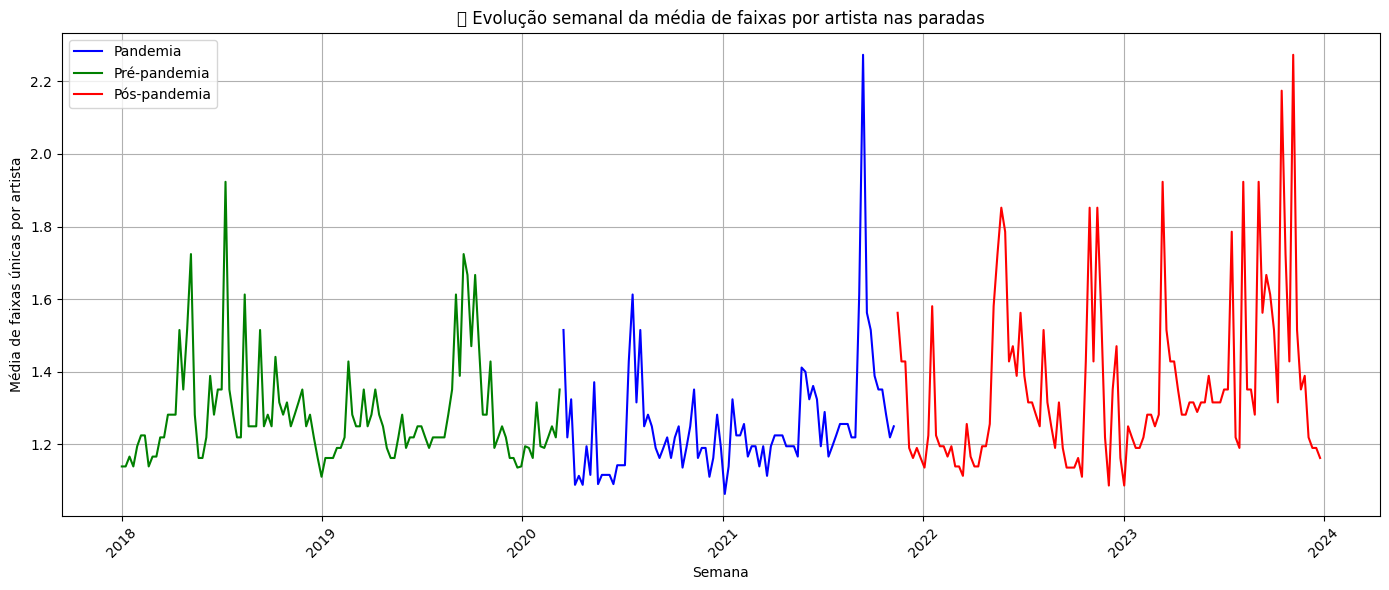

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Garantir que 'date' está como datetime ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- Definir intervalos da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- Classificar o período ---
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    elif data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- Garantir tipos ---
df["artist"] = df["artist"].astype(str)
df["spotify_id"] = df["spotify_id"].astype(str)

# --- Criar coluna de semana (início da semana) ---
df["semana"] = df["date"].dt.to_period("W").apply(lambda r: r.start_time)

# --- Remover duplicatas por semana, artista, faixa ---
df_unico = df.drop_duplicates(subset=["semana", "artist", "spotify_id"])

# --- Contar faixas por artista por semana ---
faixas_por_artista_semanal = (
    df_unico.groupby(["semana", "artist"])["spotify_id"]
    .nunique()
    .reset_index(name="num_faixas")
)

# --- Calcular média por semana ---
media_semanal = (
    faixas_por_artista_semanal.groupby("semana")["num_faixas"]
    .mean()
    .reset_index(name="media_faixas_por_artista")
)

# --- Reatribuir período por semana (baseado em df original) ---
media_semanal["periodo"] = media_semanal["semana"].apply(classificar_periodo)

# --- Gráfico de linhas ---
plt.figure(figsize=(14, 6))

cores = {
    "pré-pandemia": "green",
    "pandemia": "blue",
    "pós-pandemia": "red"
}

for periodo, grupo in media_semanal.groupby("periodo"):
    plt.plot(grupo["semana"], grupo["media_faixas_por_artista"], label=periodo.capitalize(), color=cores.get(periodo, "gray"))

plt.title("📈 Evolução semanal da média de faixas por artista nas paradas")
plt.xlabel("Semana")
plt.ylabel("Média de faixas únicas por artista")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-requisito: DataFrame 'df' carregado e df_filtrado (com release_date < date) já criado.

print("--- Análise de Concentração dos Top 5 Gêneros por Período ---")

# Lista para armazenar os resultados
resultados_concentracao = []

# Lista dos períodos para iterar
period_order = ['Pré-pandemia', 'Durante a pandemia', 'Pós-pandemia']

# Loop para fazer o cálculo para cada período individualmente
for periodo in period_order:
    # 1. Isolar os dados do período atual
    df_periodo = df_filtrado[df_filtrado['periodo'] == periodo].copy()

    # 2. Calcular o número total de músicas (entradas no ranking) no período
    total_musicas_periodo = len(df_periodo)

    # 3. Identificar os 5 gêneros mais populares DESTE período
    top_5_generos = df_periodo['genre'].value_counts().nlargest(5).index
    print(f"\nNo período '{periodo}', os Top 5 gêneros foram: {list(top_5_generos)}")

    # 4. Calcular quantas músicas pertencem a esses 5 gêneros
    musicas_do_top_5 = df_periodo[df_periodo['genre'].isin(top_5_generos)]
    total_musicas_top_5 = len(musicas_do_top_5)

    # 5. Calcular a porcentagem de concentração
    percentual_concentracao = (total_musicas_top_5 / total_musicas_periodo) * 100

    # 6. Guardar o resultado
    resultados_concentracao.append({'periodo': periodo, 'percentual': percentual_concentracao})
    print(f"--> Eles representaram {percentual_concentracao:.2f}% do total de músicas ouvidas.")

# Converter a lista de resultados em um DataFrame para facilitar a plotagem
df_resultados = pd.DataFrame(resultados_concentracao)


# --- Gerar o Gráfico de Barras ---
plt.figure(figsize=(10, 6))
# Usamos a paleta de azul que você gostou
minha_paleta_azul = ["#08519c", "#3182bd", "#6baed6"]

barplot = sns.barplot(x='periodo', y='percentual', data=df_resultados, palette=minha_paleta_azul, order=period_order)

# Adicionar os valores percentuais no topo das barras
for index, row in df_resultados.iterrows():
    barplot.text(row.name, row.percentual + 0.5, f'{row.percentual:.1f}%', color='black', ha="center")

plt.title('Concentração de Popularidade: % do Total Coberto pelos Top 5 Gêneros')
plt.ylabel('Percentual do Total de Músicas (%)')
plt.xlabel('Período')
plt.ylim(0, 100) # Define o limite do eixo Y de 0 a 100
plt.show()

--- Análise de Concentração dos Top 5 Gêneros por Período ---


NameError: name 'df_filtrado' is not defined


=== TRACK IDs ÚNICOS POR PERÍODO ===
        periodo  ids_unicos  percentual
1  pré-pandemia         518       34.06
0      pandemia         460       30.24
2  pós-pandemia         543       35.70


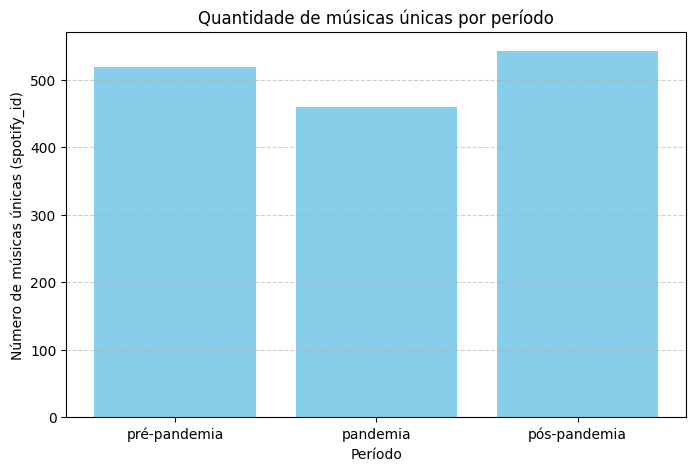

In [ ]:
# ==========================================================
#   CONTAGEM DE TRACK IDs ÚNICOS POR PERÍODO DA PANDEMIA
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Carregar base de dados ---
# Substitua pelo nome do seu arquivo
df = pd.read_excel("/content/base_final (1).xlsx")

# --- 2. Converter coluna de data ---
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# --- 3. Definir intervalos da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- 4. Função para classificar período (sem “desconhecido”) ---
def classificar_periodo(data):
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

# --- 5. Aplicar classificação ---
# Linhas com data inválida serão removidas
df = df.dropna(subset=["date"])
df["periodo"] = df["date"].apply(classificar_periodo)

# --- 6. Contar IDs únicos por período ---
ids_unicos_por_periodo = (
    df.groupby("periodo")["spotify_id"].nunique().reset_index(name="ids_unicos")
)

# --- 7. Calcular percentuais ---
total = ids_unicos_por_periodo["ids_unicos"].sum()
ids_unicos_por_periodo["percentual"] = (
    ids_unicos_por_periodo["ids_unicos"] / total * 100
).round(2)

# --- 7. Ordenar períodos de forma lógica ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
ids_unicos_por_periodo["periodo"] = pd.Categorical(
    ids_unicos_por_periodo["periodo"], categories=ordem_periodos, ordered=True
)
ids_unicos_por_periodo = ids_unicos_por_periodo.sort_values("periodo")

# --- 8. Mostrar resultado ---
print("\n=== TRACK IDs ÚNICOS POR PERÍODO ===")
print(ids_unicos_por_periodo.sort_values("periodo"))

# --- 9. Plotar gráfico ---
plt.figure(figsize=(8,5))
plt.bar(ids_unicos_por_periodo["periodo"], ids_unicos_por_periodo["ids_unicos"], color="skyblue")
plt.title("Quantidade de músicas únicas por período")
plt.xlabel("Período")
plt.ylabel("Número de músicas únicas (spotify_id)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


=== TRACK IDs ÚNICOS POR PERÍODO ===
        periodo  ids_unicos  percentual
1  pré-pandemia         518       34.06
0      pandemia         460       30.24
2  pós-pandemia         543       35.70


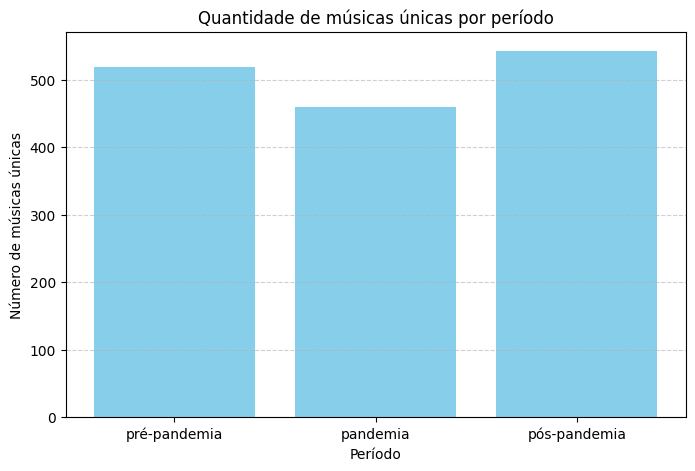


=== FAIXAS NOVAS DURANTE A PANDEMIA ===
Faixas novas na pandemia: 322
Total de faixas na pandemia: 461
➡️ Percentual de faixas novas: 69.85%


In [ ]:
# ==========================================================
#   ANÁLISE DE TRACK IDs ÚNICOS POR PERÍODO DA PANDEMIA
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Carregar base de dados ---
# Substitua o nome do arquivo conforme o seu caso:
df = pd.read_excel("/content/base_final (1).xlsx")

# --- 2. Converter a coluna de data ---
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# --- 3. Definir intervalos da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- 4. Classificar períodos ---
def classificar_periodo(data):
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

# Remover linhas sem data e aplicar classificação
df = df.dropna(subset=["date"])
df["periodo"] = df["date"].apply(classificar_periodo)

# --- 5. Contar IDs únicos por período ---
ids_unicos_por_periodo = (
    df.groupby("periodo")["spotify_id"]
    .nunique()
    .reset_index(name="ids_unicos")
)

# --- 6. Calcular percentuais ---
total = ids_unicos_por_periodo["ids_unicos"].sum()
ids_unicos_por_periodo["percentual"] = (
    ids_unicos_por_periodo["ids_unicos"] / total * 100
).round(2)

# --- 7. Ordenar períodos (pré → pandemia → pós) ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
ids_unicos_por_periodo["periodo"] = pd.Categorical(
    ids_unicos_por_periodo["periodo"], categories=ordem_periodos, ordered=True
)
ids_unicos_por_periodo = ids_unicos_por_periodo.sort_values("periodo")

# --- 8. Mostrar resultado geral ---
print("\n=== TRACK IDs ÚNICOS POR PERÍODO ===")
print(ids_unicos_por_periodo)

# --- 9. Plotar gráfico de barras ---
plt.figure(figsize=(8,5))
plt.bar(ids_unicos_por_periodo["periodo"], ids_unicos_por_periodo["ids_unicos"], color="skyblue")
plt.title("Quantidade de músicas únicas por período")
plt.xlabel("Período")
plt.ylabel("Número de músicas únicas")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# --- 10. Calcular faixas novas durante a pandemia ---
# Conjuntos de IDs únicos por período
ids_pre = set(df.loc[df["periodo"] == "pré-pandemia", "spotify_id"].unique())
ids_pand = set(df.loc[df["periodo"] == "pandemia", "spotify_id"].unique())

# Faixas que surgiram pela primeira vez durante a pandemia
faixas_novas_pandemia = ids_pand - ids_pre

# Quantidades
num_faixas_novas = len(faixas_novas_pandemia)
num_total_pandemia = len(ids_pand)

# Percentual de faixas novas na pandemia
percentual_novas = round(num_faixas_novas / num_total_pandemia * 100, 2)

print("\n=== FAIXAS NOVAS DURANTE A PANDEMIA ===")
print(f"Faixas novas na pandemia: {num_faixas_novas}")
print(f"Total de faixas na pandemia: {num_total_pandemia}")
print(f"➡️ Percentual de faixas novas: {percentual_novas}%")



=== TRACK IDs ÚNICOS POR PERÍODO ===
        periodo  ids_unicos  percentual
1  pré-pandemia         518       34.06
0      pandemia         460       30.24
2  pós-pandemia         543       35.70


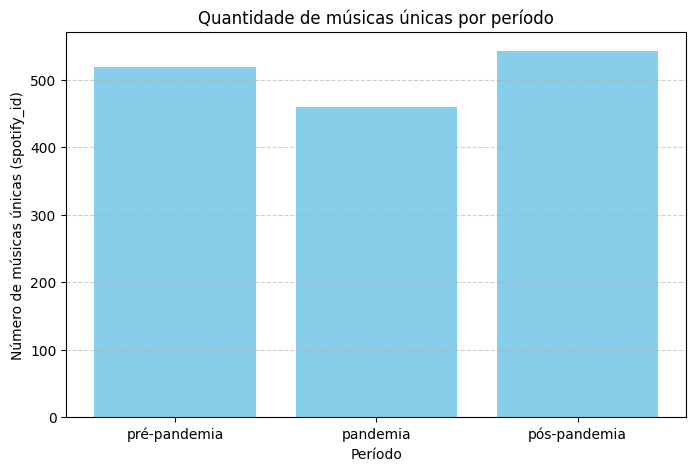


=== FAIXAS NOVAS DURANTE A PANDEMIA ===
Faixas novas na pandemia: 322
Total de faixas na pandemia: 461
➡️ Percentual de faixas novas: 69.85%

=== FAIXAS NOVAS NO PÓS-PANDEMIA ===
Faixas novas no pós-pandemia: 422
Total de faixas no pós-pandemia: 544
➡️ Percentual de faixas novas: 77.57%

=== FAIXAS QUE PERMANECERAM DA PANDEMIA PARA O PÓS ===
Faixas que continuaram: 122
➡️ Percentual que se manteve: 22.43%


In [ ]:
# ==========================================================
#   ANÁLISE DE TRACK IDs ÚNICOS POR PERÍODO DA PANDEMIA
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Carregar base de dados ---
# Substitua o nome do arquivo conforme o seu caso:
df = pd.read_excel("/content/base_final (1).xlsx")

# --- 2. Converter a coluna de data ---
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# --- 3. Definir intervalos da pandemia ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

# --- 4. Classificar períodos ---
def classificar_periodo(data):
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

# Remover linhas sem data e aplicar classificação
df = df.dropna(subset=["date"])
df["periodo"] = df["date"].apply(classificar_periodo)

# --- 5. Contar IDs únicos por período ---
ids_unicos_por_periodo = (
    df.groupby("periodo")["spotify_id"]
    .nunique()
    .reset_index(name="ids_unicos")
)

# --- 6. Calcular percentuais ---
total = ids_unicos_por_periodo["ids_unicos"].sum()
ids_unicos_por_periodo["percentual"] = (
    ids_unicos_por_periodo["ids_unicos"] / total * 100
).round(2)

# --- 7. Ordenar períodos (pré → pandemia → pós) ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
ids_unicos_por_periodo["periodo"] = pd.Categorical(
    ids_unicos_por_periodo["periodo"], categories=ordem_periodos, ordered=True
)
ids_unicos_por_periodo = ids_unicos_por_periodo.sort_values("periodo")

# --- 8. Mostrar resultado geral ---
print("\n=== TRACK IDs ÚNICOS POR PERÍODO ===")
print(ids_unicos_por_periodo)

# --- 9. Plotar gráfico de barras ---
plt.figure(figsize=(8,5))
plt.bar(ids_unicos_por_periodo["periodo"], ids_unicos_por_periodo["ids_unicos"], color="skyblue")
plt.title("Quantidade de músicas únicas por período")
plt.xlabel("Período")
plt.ylabel("Número de músicas únicas (spotify_id)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# ==========================================================
#   ANÁLISE DE RENOVAÇÃO DE FAIXAS ENTRE PERÍODOS
# ==========================================================

# --- 10. Faixas novas durante a pandemia ---
ids_pre = set(df.loc[df["periodo"] == "pré-pandemia", "spotify_id"].unique())
ids_pand = set(df.loc[df["periodo"] == "pandemia", "spotify_id"].unique())

# Faixas que surgiram pela primeira vez durante a pandemia
faixas_novas_pandemia = ids_pand - ids_pre
num_faixas_novas_pandemia = len(faixas_novas_pandemia)
num_total_pandemia = len(ids_pand)
percentual_novas_pandemia = round(num_faixas_novas_pandemia / num_total_pandemia * 100, 2)

print("\n=== FAIXAS NOVAS DURANTE A PANDEMIA ===")
print(f"Faixas novas na pandemia: {num_faixas_novas_pandemia}")
print(f"Total de faixas na pandemia: {num_total_pandemia}")
print(f"➡️ Percentual de faixas novas: {percentual_novas_pandemia}%")

# --- 11. Faixas novas no pós-pandemia ---
ids_pos = set(df.loc[df["periodo"] == "pós-pandemia", "spotify_id"].unique())

# Faixas que surgiram pela primeira vez no pós-pandemia
faixas_novas_pos = ids_pos - ids_pand
num_faixas_novas_pos = len(faixas_novas_pos)
num_total_pos = len(ids_pos)
percentual_novas_pos = round(num_faixas_novas_pos / num_total_pos * 100, 2)

print("\n=== FAIXAS NOVAS NO PÓS-PANDEMIA ===")
print(f"Faixas novas no pós-pandemia: {num_faixas_novas_pos}")
print(f"Total de faixas no pós-pandemia: {num_total_pos}")
print(f"➡️ Percentual de faixas novas: {percentual_novas_pos}%")

# --- 12. (Opcional) Faixas que permaneceram da pandemia para o pós-pandemia ---
faixas_permaneceram = ids_pand & ids_pos
num_permaneceram = len(faixas_permaneceram)
percentual_permaneceram = round(num_permaneceram / num_total_pos * 100, 2)

print("\n=== FAIXAS QUE PERMANECERAM DA PANDEMIA PARA O PÓS ===")
print(f"Faixas que continuaram: {num_permaneceram}")
print(f"➡️ Percentual que se manteve: {percentual_permaneceram}%")


/tmp/ipython-input-3381797214.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mode["mode"] = df_mode["mode"].str.lower()  # 'major' / 'minor'
/tmp/ipython-input-3381797214.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-3381797214.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
/tmp/ipython-input-3381797214.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-3381797214.py:81: UserWarning: set_ticklabels() should only be used with a f

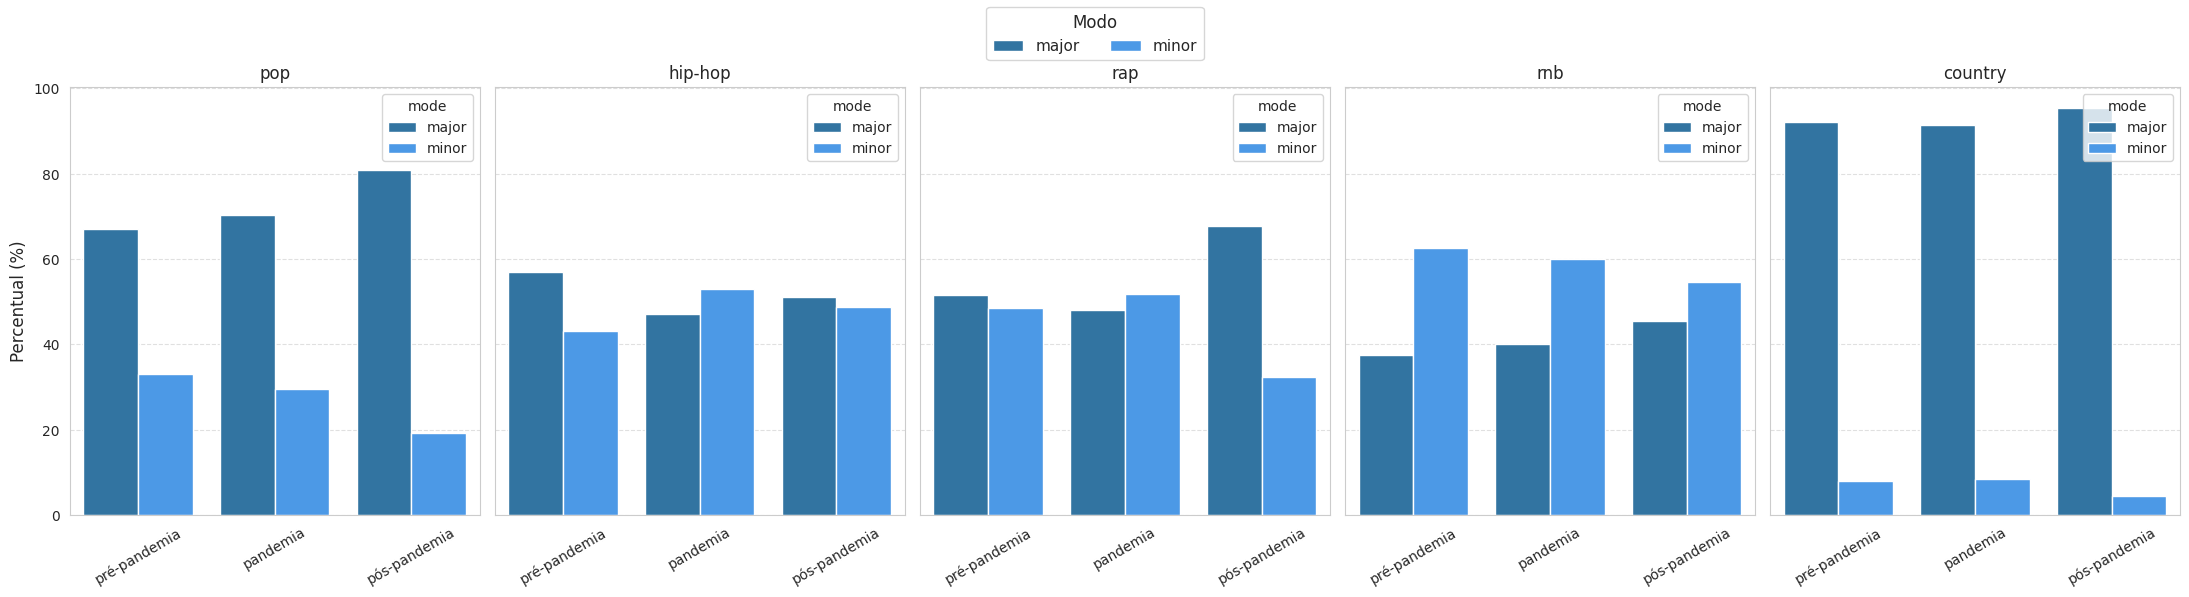

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carregar dados ---
df = pd.read_excel("/content/base_final (1).xlsx")  # substitua pelo caminho do seu arquivo

# --- 2. Converter datas ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- 3. Definir períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- 4. Filtrar linhas com mode válido e padronizar ---
df_mode = df.dropna(subset=["mode", "genre"])
df_mode["mode"] = df_mode["mode"].str.lower()  # 'major' / 'minor'

# --- 5. Selecionar os 5 gêneros mais populares ---
top_generos = df_mode["genre"].value_counts().head(5).index
df_top = df_mode[df_mode["genre"].isin(top_generos)]

# --- 6. Contagem de faixas únicas por período, gênero e modo ---
modo_genero_periodo = (
    df_top.groupby(["genre", "periodo", "mode"])["spotify_id"]
    .nunique()
    .reset_index(name="num_faixas")
)

# --- 7. Total de faixas por gênero e período ---
total_genero_periodo = (
    df_top.groupby(["genre", "periodo"])["spotify_id"]
    .nunique()
    .reset_index(name="total_faixas")
)

# --- 8. Calcular percentual ---
modo_genero_periodo = pd.merge(modo_genero_periodo, total_genero_periodo, on=["genre", "periodo"])
modo_genero_periodo["percentual"] = (modo_genero_periodo["num_faixas"] / modo_genero_periodo["total_faixas"] * 100).round(2)

# --- 9. Ordenar períodos ---
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
modo_genero_periodo["periodo"] = pd.Categorical(modo_genero_periodo["periodo"], categories=ordem_periodos, ordered=True)
modo_genero_periodo = modo_genero_periodo.sort_values(["genre", "periodo"])

# --- 10. Plotar 5 gráficos de barras (um para cada gênero) ---
sns.set_style("whitegrid")
palette = {"major": "#1f77b4", "minor": "#3399ff"}

fig, axes = plt.subplots(1, 5, figsize=(22, 6), sharey=True)

for i, genero in enumerate(top_generos):
    ax = axes[i]
    df_plot = modo_genero_periodo[modo_genero_periodo["genre"] == genero]
    sns.barplot(
        data=df_plot,
        x="periodo",
        y="percentual",
        hue="mode",
        hue_order=["major", "minor"],
        palette=palette,
        ax=ax,
        ci=None
    )
    ax.set_title(genero, fontsize=12)
    ax.set_xlabel("")
    if i == 0:
        ax.set_ylabel("Percentual (%)", fontsize=12)
    else:
        ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# Ajustar legenda
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title="Modo", loc="upper center", ncol=2, fontsize=11, title_fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

/tmp/ipython-input-2736078821.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mode["mode"] = df_mode["mode"].str.lower()  # 'major' / 'minor'
/tmp/ipython-input-2736078821.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["mes"] = df_top["date"].dt.to_period("M").apply(lambda r: r.start_time)


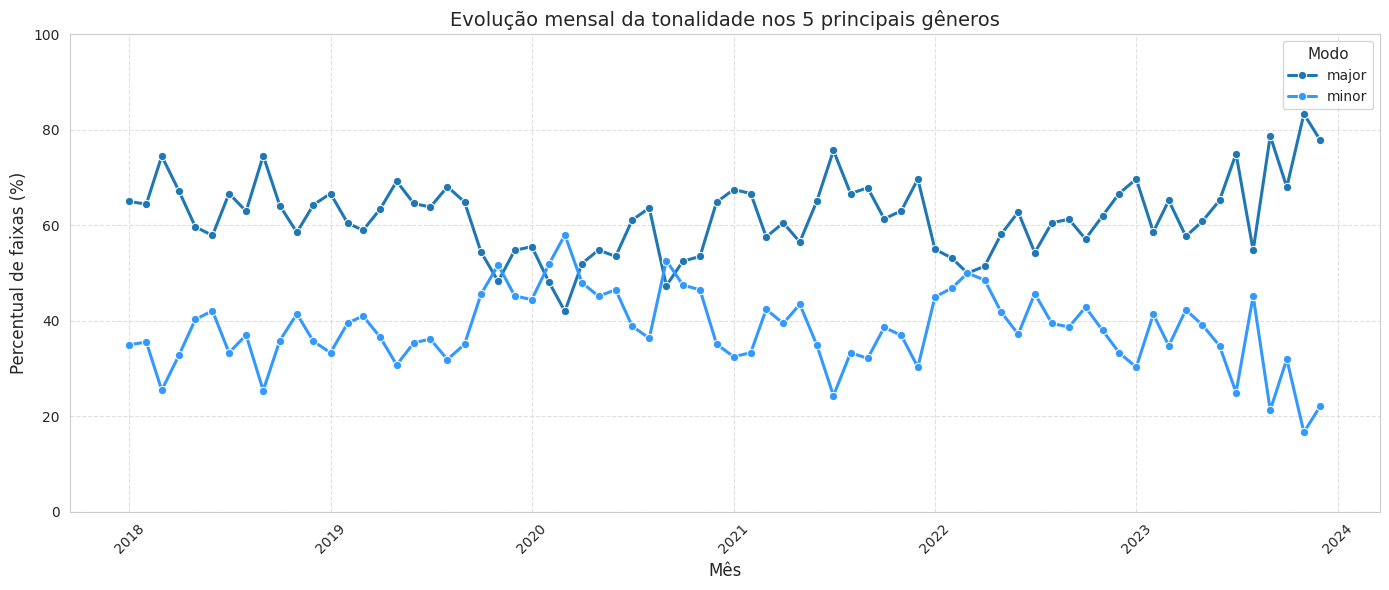

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carregar dados ---
df = pd.read_excel("/content/base_final (1).xlsx")  # substitua pelo caminho correto

# --- 2. Converter datas ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- 3. Filtrar linhas com mode válido e padronizar ---
df_mode = df.dropna(subset=["mode", "genre"])
df_mode["mode"] = df_mode["mode"].str.lower()  # 'major' / 'minor'

# --- 4. Selecionar os 5 gêneros mais populares ---
top_generos = df_mode["genre"].value_counts().head(5).index
df_top = df_mode[df_mode["genre"].isin(top_generos)]

# --- 5. Criar coluna de mês ---
df_top["mes"] = df_top["date"].dt.to_period("M").apply(lambda r: r.start_time)

# --- 6. Contagem de faixas únicas por mês e mode ---
modo_mensal = (
    df_top.groupby(["mes", "mode"])["spotify_id"]
    .nunique()
    .reset_index(name="num_faixas")
)

# --- 7. Total de faixas por mês ---
total_mensal = df_top.groupby("mes")["spotify_id"].nunique().reset_index(name="total_faixas")

# --- 8. Calcular percentual ---
modo_mensal = pd.merge(modo_mensal, total_mensal, on="mes")
modo_mensal["percentual"] = (modo_mensal["num_faixas"] / modo_mensal["total_faixas"] * 100).round(2)

# --- 9. Plotar gráfico de linha ---
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

palette = {"major": "#1f77b4", "minor": "#3399ff"}

sns.lineplot(
    data=modo_mensal,
    x="mes",
    y="percentual",
    hue="mode",
    palette=palette,
    marker="o",
    linewidth=2.2
)

plt.title("Evolução mensal da tonalidade nos 5 principais gêneros", fontsize=14)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Percentual de faixas (%)", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Modo", title_fontsize=11, fontsize=10)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2690958381.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mode["mode"] = df_mode["mode"].str.lower()  # 'major' / 'minor'
/tmp/ipython-input-2690958381.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["mes"] = df_top["date"].dt.to_period("M").apply(lambda r: r.start_time)


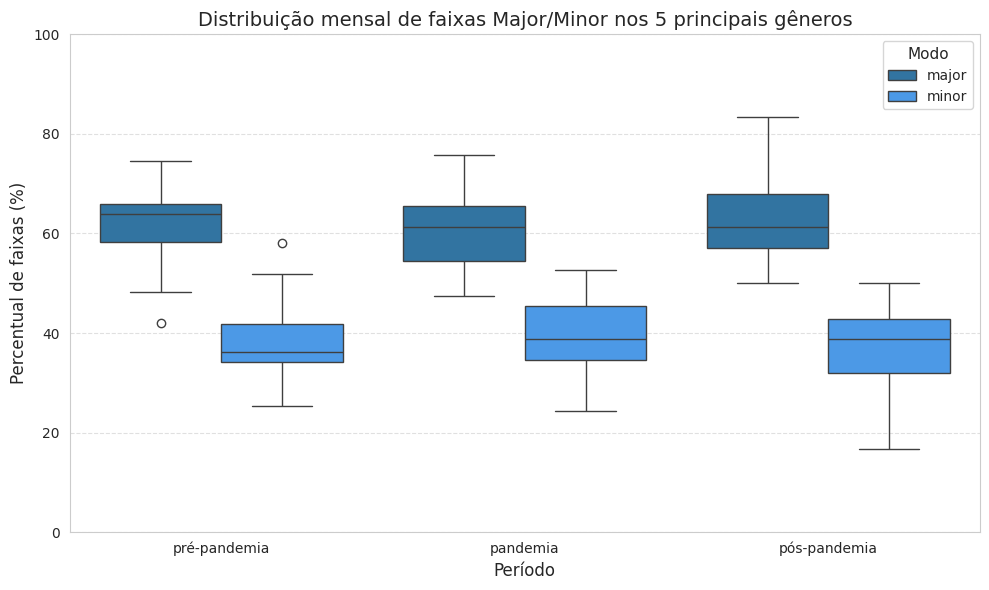

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carregar dados ---
df = pd.read_excel("/content/base_final (1).xlsx")  # substitua pelo caminho correto do arquivo

# --- 2. Converter datas ---
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# --- 3. Definir períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df["periodo"] = df["date"].apply(classificar_periodo)

# --- 4. Filtrar linhas com mode válido e padronizar ---
df_mode = df.dropna(subset=["mode", "genre"])
df_mode["mode"] = df_mode["mode"].str.lower()  # 'major' / 'minor'

# --- 5. Selecionar os 5 gêneros mais populares ---
top_generos = df_mode["genre"].value_counts().head(5).index
df_top = df_mode[df_mode["genre"].isin(top_generos)]

# --- 6. Criar coluna de mês ---
df_top["mes"] = df_top["date"].dt.to_period("M").apply(lambda r: r.start_time)

# --- 7. Calcular percentual mensal de cada mode ---
# Contagem de faixas únicas por mês e mode
modo_mensal = (
    df_top.groupby(["mes", "mode"])["spotify_id"]
    .nunique()
    .reset_index(name="num_faixas")
)

# Total de faixas por mês
total_mensal = df_top.groupby("mes")["spotify_id"].nunique().reset_index(name="total_faixas")

# Calcular percentual
modo_mensal = pd.merge(modo_mensal, total_mensal, on="mes")
modo_mensal["percentual"] = (modo_mensal["num_faixas"] / modo_mensal["total_faixas"] * 100).round(2)

# --- 8. Adicionar coluna de período ---
modo_mensal["periodo"] = modo_mensal["mes"].apply(classificar_periodo)

# --- 9. Plotar boxplot ---
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

palette = {"major": "#1f77b4", "minor": "#3399ff"}

sns.boxplot(
    data=modo_mensal,
    x="periodo",
    y="percentual",
    hue="mode",
    palette=palette,
    hue_order=["major", "minor"]
)

plt.title("Distribuição mensal de faixas Major/Minor nos 5 principais gêneros", fontsize=14)
plt.xlabel("Período", fontsize=12)
plt.ylabel("Percentual de faixas (%)", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Modo", title_fontsize=11, fontsize=10)
plt.tight_layout()
plt.show()